In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/predicting-blood-analysis/blood-train.csv')

In [3]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
# remove Unnamed: 0 as it is unnacessary 
df = df.iloc[:,1:]

<AxesSubplot:>

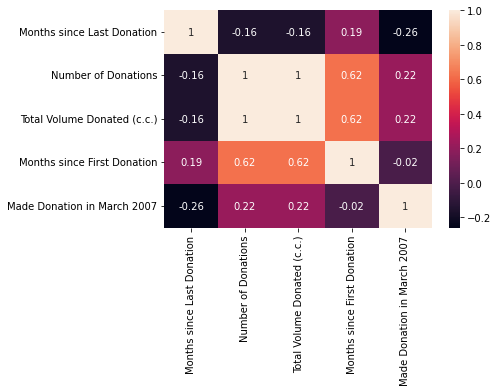

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
df.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [7]:

df['Donation Period'] = df['Months since First Donation'] - df['Months since Last Donation']
df.drop(['Total Volume Donated (c.c.)', 'Months since First Donation', 'Months since Last Donation'], axis=1,inplace=True)

<AxesSubplot:>

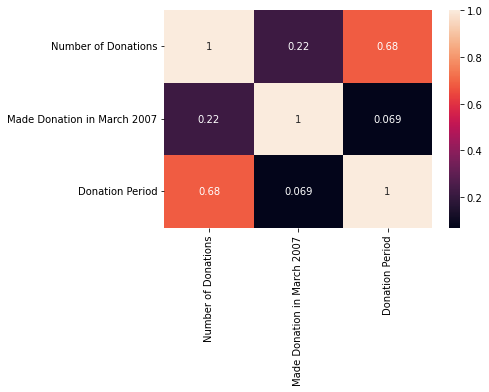

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                df.drop(['Made Donation in March 2007'],axis=1),
                df['Made Donation in March 2007'], test_size=0.20, random_state=42)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Made Donation in March 2007', ylabel='count'>

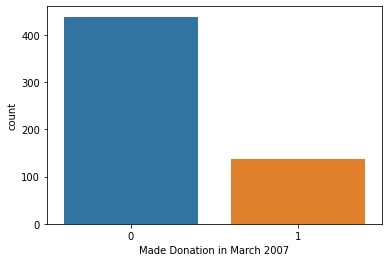

In [10]:
sns.countplot(df['Made Donation in March 2007'])

In [11]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [13]:

# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)


0.75

In [14]:
# Train with Standard scaled Data
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.75

In [15]:

# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.7758620689655172